# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *E*

**Names:**

* *Enrico Benedettini*
* *Mak Fazlic*
* *Ali Essonni*
* *Youssef Amine*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [4]:
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# First, we open the file, read its content in an array of lines and then close the file

with open("../data/network1.csv","r") as f:
    G = nx.read_edgelist(f,delimiter=',')
    print(f"The graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
    f.close()

The graph has 13033 nodes and 18584 edges


#### Exercise 2.2:  Node degree distribution

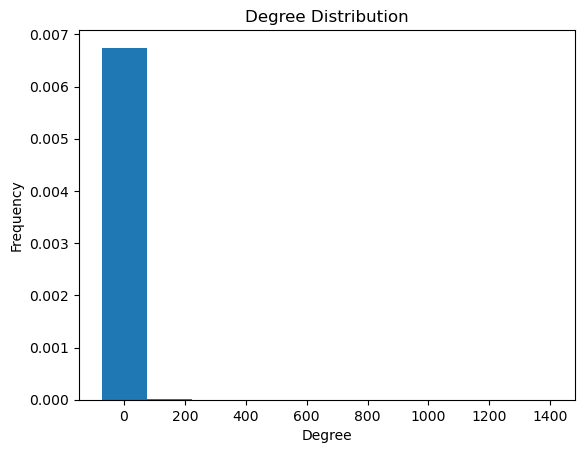

In [13]:
# To compute the degree distribution we simply get the histogram and plot the bar with as x values 
# all the different possible degrees of a node and as y the number of nodes having that degree

degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, align='left', density=True)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()


#### Exercise 2.3: Giant component

In [23]:
num_of_components = nx.number_connected_components(G)
print(f"The graph has {num_of_components} connected components")

connected_components = nx.connected_components(G)
biggest = G.subgraph(max(connected_components, key=len))
print(f"The giant component has {biggest.number_of_nodes()} nodes and {biggest.number_of_edges()} edges")


The graph has 192 connected components
The giant component has 12576 nodes and 18317 edges


#### Exercise 2.4: Short paths & Small-worlds

#### Exercise 2.5: Network comparison

#### Exercise 2.6: Network identification